In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import csv
import warnings
import os
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
import nltk
from nltk.corpus import stopwords
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/UkraineCombinedTweetsDeduped_MAR26.csv.gzip
/kaggle/input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/UkraineCombinedTweetsDeduped_MAR31.csv.gzip
/kaggle/input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/0412_UkraineCombinedTweetsDeduped.csv.gzip
/kaggle/input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/UkraineCombinedTweetsDeduped_FEB27.csv.gzip
/kaggle/input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/UkraineCombinedTweetsDeduped_MAR27_to_28.csv.gzip
/kaggle/input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/0502_UkraineCombinedTweetsDeduped.csv.gzip
/kaggle/input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/0422_UkraineCombinedTweetsDeduped.csv.gzip
/kaggle/input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/UkraineCombinedTweetsDeduped_MAR24.csv.gzip
/kaggle/input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/UkraineCombinedTweetsDeduped_MAR20.csv.gzip
/kaggle/input/ukraine-rus

# **Making a dataframe to perform our analysis(27th Feb-1st March)**

In [2]:
warnings.simplefilter(action='ignore')

file27_1 = r"/kaggle/input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/UkraineCombinedTweetsDeduped_FEB27.csv.gzip"
file28_1 = r"/kaggle/input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/UkraineCombinedTweetsDeduped_FEB28_part1.csv.gzip"
file27_2 = r"/kaggle/input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/UkraineCombinedTweetsDeduped20220227-131611.csv.gzip"
file28_2 = r"/kaggle/input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/UkraineCombinedTweetsDeduped_FEB28_part2.csv.gzip"
file01  = r"../input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/UkraineCombinedTweetsDeduped_MAR01.csv.gzip"

df27_1 = pd.read_csv(file27_1, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
df28_1 = pd.read_csv(file28_1, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
df27_2 = pd.read_csv(file27_2, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
df28_2 = pd.read_csv(file28_2, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
df_0301 = pd.read_csv(file01, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)


df27 = pd.concat([df27_1,df27_2])
df28 = pd.concat([df28_1,df28_2])
df = pd.concat([df27,df28,df_0301])

print(len(df27), 'tweets from 27th FEB')
print(len(df28), 'tweets from 28th FEB')
print(len(df_0301),'tweets from 1st march')
print(len(df),'tweets from the last 3 days')

1586367 tweets from 27th FEB
378171 tweets from 28th FEB
409279 tweets from 1st march
2373817 tweets from the last 3 days


# **Using English Text Only**

In [3]:
tweet = df[df['language'] == 'en'] #tweets with only english language
tweet_df = tweet.loc[:,['text']]    #content of the tweets
tweet_df.head()

,text
1141800,#UkraineRussiaWar Captured Russian soldiers\n\...
1141801,Like everybody else I am rooting for Ukraine t...
1141803,We elected a game show host and got a clown. #...
1141804,Ukrainian soldiers wearing sunflowers in their...
1141805,russian troops destroyed a commercial oil base...


# **Preprocessing the text**

In [12]:
def clean_text(text):
#lowercase   
    text = text.lower()
#remove square brackets
    text = re.sub(r'\[.*?\]', '', text)
#remove punctuation   
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text) 
#remove numbers
    text = re.sub(r'\w*\d\w*', '', text)
#remove urls   
    text = re.sub(r'http\S+', '', text)
#remove emojis    
    patterns = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F" 
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
                           "]+", flags = re.UNICODE)
    text = patterns.sub(r'', text)
    return text

In [ ]:
tweetsdf = pd.DataFrame(tweet_df.text.apply(lambda x: clean_text(x)))

# **EDA**

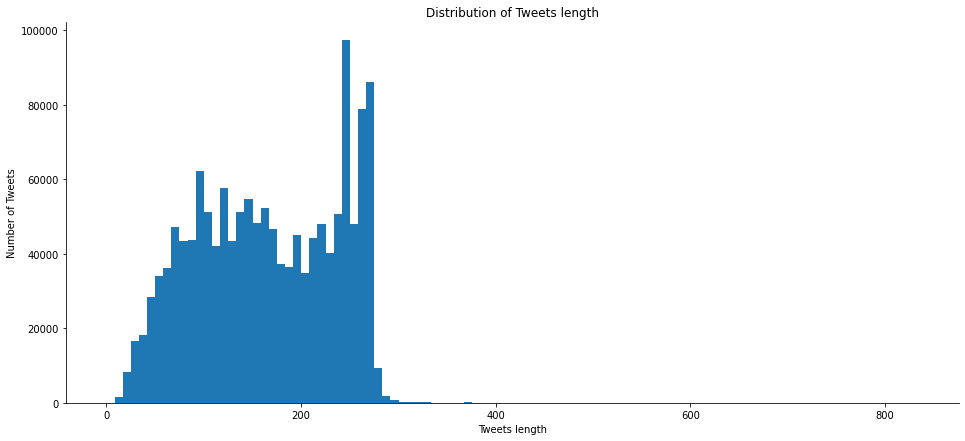

In [5]:
plt.figure(figsize=(10,7))
text_len = [len(d) for d in tweetsdf.text]
plt.hist(text_len, bins=100)
plt.title('Distribution of Tweets')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets length')
sns.despine();

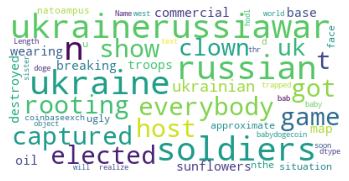

In [6]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      random_state=42).generate(str(tweetdf['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [12]:
df_en=df[df["language"] == "en"].location.value_counts().sort_values(ascending=False)[:100]
df_en= pd.DataFrame(df_en)

In [13]:
df_en=df_en.reset_index()

In [14]:
long,lat=[],[]
geolocator = Nominatim(user_agent="MyApp")
for i in range(len(df_en)):
    location = geolocator.geocode(df_en['index'][i])
    long.append(location.longitude)
    lat.append(location.latitude)

In [16]:
df_en.insert(1, "latitude",lat, True)
df_en.insert(2, "longitude",long, True)

In [17]:

world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(df_en)):
        lat = df_en.iloc[i]['latitude']
        long = df_en.iloc[i]['longitude']
        radius=5
        folium.CircleMarker(location = [lat, long], radius=radius, fill =True).add_to(marker_cluster)
world_map


# **Constructing N-grams**

In [1]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

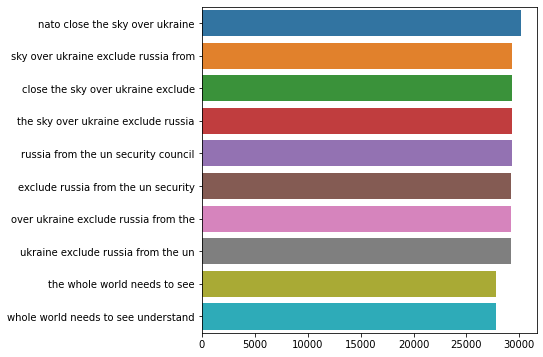

In [24]:
mpl.rcParams['figure.figsize']=(6.0,6.0)  

plot_top_ngrams_barchart(tweetsdf['text'],6)

# **Tokenizing our text for LDA**

In [29]:
tweetsdf['text']=tweetsdf['text'].apply(tokenize_lowercase)
text_dict = Dictionary(tweetsdf['text'])
text_dict.token2id
tweets_bow = [text_dict.doc2bow(tweet) for tweet in tweetsdf['text']]

# **Fitting LDA Model and Visualization**

In [30]:
tweets_lda = LdaModel(tweets_bow,
                      num_topics = 10,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()

[(0,
  '0.042*"president" + 0.038*"’" + 0.033*"one" + 0.029*"zelensky" + 0.027*"country" + 0.026*"international" + 0.024*"reach" + 0.021*"sister" + 0.020*"injuries" + 0.020*"deprivation"'),
 (1,
  '0.089*"ukraine" + 0.057*"ukrainerussiawar" + 0.038*"russia" + 0.031*"putin" + 0.030*"stop" + 0.026*"stopputin" + 0.025*"war" + 0.022*"russian" + 0.022*"kyiv" + 0.013*"world"'),
 (2,
  '0.057*"ukraine" + 0.024*"people" + 0.023*"russiaukraine" + 0.023*"amp" + 0.011*"poland" + 0.011*"help" + 0.010*"ukrainian" + 0.010*"support" + 0.010*"media" + 0.009*"’"'),
 (3,
  '0.044*"ukraine" + 0.031*"un" + 0.025*"war" + 0.024*"council" + 0.022*"russia" + 0.021*"’" + 0.016*"“" + 0.016*"”" + 0.015*"putin" + 0.012*"palestine"'),
 (4,
  '0.064*"kharkiv" + 0.033*"kyiv" + 0.024*"shelling" + 0.021*"freezing" + 0.019*"city" + 0.018*"million" + 0.016*"nuclearwar" + 0.015*"—" + 0.014*"appeal" + 0.013*"control"'),
 (5,
  '0.052*"russian" + 0.034*"ukraine" + 0.029*"russia" + 0.029*"military" + 0.026*"kyiv" + 0.022*"f

In [31]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
vis

/opt/conda/lib/python3.7/site-packages/past/types/oldstr.py:36: DeprecationWarning: invalid escape sequence \d
  """


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.141108  0.001509       1        1  18.570588
3      0.101295  0.147504       2        1  15.926444
2      0.046443  0.184023       3        1  14.423958
6      0.219598  0.026913       4        1  13.454486
5      0.113413 -0.138568       5        1   8.559504
9      0.084250 -0.068606       6        1   6.750708
8     -0.049895 -0.265791       7        1   6.249093
7     -0.227084  0.127188       8        1   6.220673
0     -0.202751  0.181881       9        1   5.305262
4     -0.226377 -0.196052      10        1   4.539283, topic_info=                  Term           Freq         Total Category  logprob  loglift
10    ukrainerussiawar  253026.000000  2.530260e+05  Default  30.0000  30.0000
32                   ’  213862.000000  2.138620e+05  Default  29.0000  29.0000
107              world  123786.000000  1.237860e+05  Default  28.0000  28.0000
70                kyiv  201558.000000  2.015580e+05  Default  27.0000  27.0000
3              russian  349008.000000  3.490080e+05  Default  26.0000  26.0000
...                ...            ...           ...      ...      ...      ...
70                kyiv   35652.359967  2.015589e+05  Topic10  -3.4082   1.3601
715              would   11606.665023  3.436806e+04  Topic10  -4.5304   2.0069
102   russiaukrainewar   12136.372386  6.038691e+04  Topic10  -4.4858   1.4878
1739           western    8010.053642  1.861012e+04  Topic10  -4.9013   2.2494
9              ukraine   10257.746420  1.192546e+06  Topic10  -4.6540  -1.6634

[471 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
5695      4  0.999888   abandoned
3019      5  0.999900   according
904       7  0.999923     address
6919      5  0.999926   afternoon
1062      2  0.001984  aggression
...     ...       ...         ...
32        9  0.222293           ’
93        2  0.999979           “
94        2  0.999991           ”
5899      5  0.999933           •
792       5  0.999872          ⚡️

[582 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 7, 6, 10, 9, 8, 1, 5])

# **Making a dataframe to perform our analysis(19th April-21st April)**

In [21]:

warnings.simplefilter(action='ignore')

filename19_4 = r"/kaggle/input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/0419_UkraineCombinedTweetsDeduped.csv.gzip"
filename20_4 = r"/kaggle/input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/0420_UkraineCombinedTweetsDeduped.csv.gzip"
filename21_4 = r"/kaggle/input/ukraine-russian-crisis-twitter-dataset-1-2-m-rows/0421_UkraineCombinedTweetsDeduped.csv.gzip"

df19_4 = pd.read_csv(filename19_4, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
df20_4 = pd.read_csv(filename20_4, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)
df21_4 = pd.read_csv(filename21_4, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)

df1 = pd.concat([df19_4,df20_4,df21_4])

print(len(df1),'tweets from the last 3 days')

1174864 tweets from the last 3 days


# **Using English Text Only**

In [22]:
tweets = df1[df1["language"] == "en"] #tweets with only english language
tweets_df1 = tweets.loc[:,['text','tweetid']]    #content of the tweets
tweets_df1.head()

,text,tweetid
0,Brave doctor Olena Kushnir died in #Mariupol.\...,1516204931727781889
1,"Western media, don't steal this picture and cl...",1516204931824304130
3,Germany’s response to #Russia’s assault on #Uk...,1516204932185034753
4,#MARIUPOL—Heavy strikes by #Russia|n and #DNR ...,1516204933640425473
5,#Kharkiv and #Izyum Update:\n\n#Ukrainian forc...,1516204933686648833


# **Preprocessing the Text**

In [9]:
tweetsdf1 = pd.DataFrame(tweets_df1.text.apply(lambda x: clean_text(x)))

# **EDA**

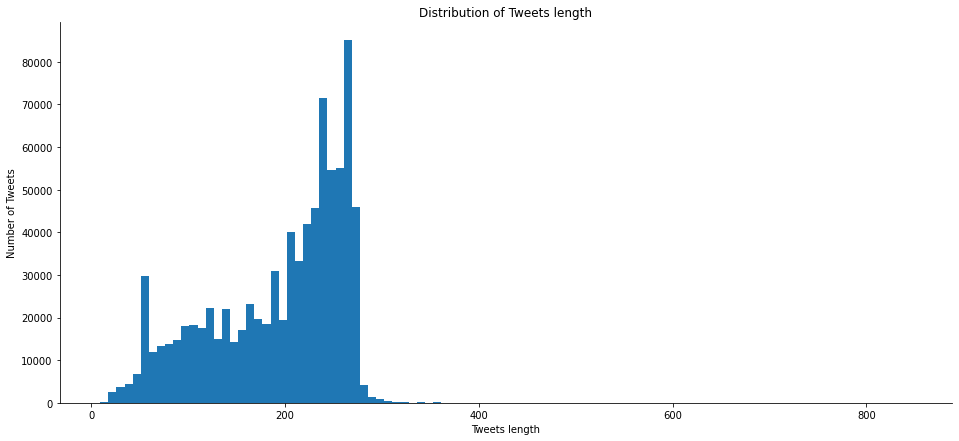

In [10]:
plt.figure(figsize=(16,7))
text_len = [len(d) for d in tweetsdf1.text]
plt.hist(text_len, bins=100)
plt.title('Distribution of Tweets')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets length')
sns.despine();

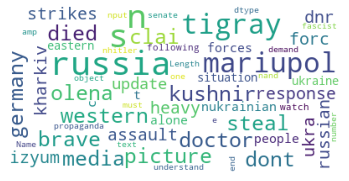

In [11]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='white',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 40,
                      random_state=42
                     ).generate(str(tweetsdf1['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [18]:
df1_en=df1[df1["language"] == "en"].location.value_counts().sort_values(ascending=False)[:100]
df1_en= pd.DataFrame(df1_en)

In [19]:
df1_en=df1_en.reset_index()

In [20]:
long,lat=[],[]
geolocator = Nominatim(user_agent="MyApp")
for i in range(len(df1_en)):
    location = geolocator.geocode(df1_en['index'][i])
    long.append(location.longitude)
    lat.append(location.latitude)

In [21]:
df1_en.insert(1, "latitude",lat, True)
df1_en.insert(2, "longitude",long, True)

In [22]:

world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
for i in range(len(df1_en)):
        lat = df1_en.iloc[i]['latitude']
        long = df1_en.iloc[i]['longitude']
        radius=5
        folium.CircleMarker(location = [lat, long], radius=radius, fill =True).add_to(marker_cluster)
world_map



# **Constructing N-grams**

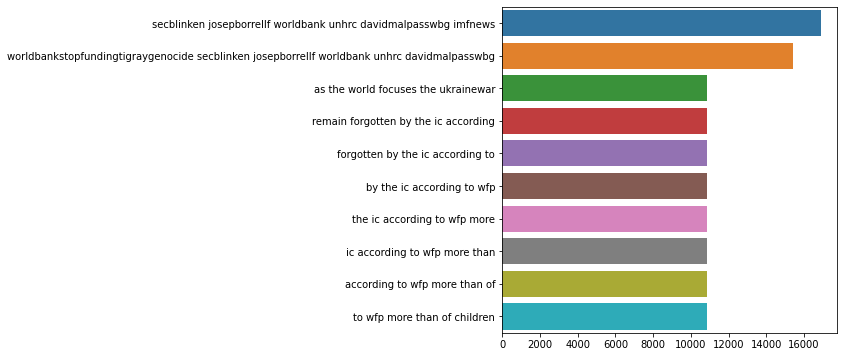

In [25]:
mpl.rcParams['figure.figsize']=(6.0,6.0)  

plot_top_ngrams_barchart(tweetsdf1['text'],6)

# **Tokenizing our text for LDA**

In [6]:
stop_words = stopwords.words('english')
stop_words += list(string.punctuation) 
stop_words += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
def tokenize_lowercase(text):
    tokens = nltk.word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed

In [7]:
tweetsdf1['text']=tweetsdf1['text'].apply(tokenize_lowercase)
text_dict = Dictionary(tweetsdf1['text'])
text_dict.token2id
tweets_bow = [text_dict.doc2bow(tweet) for tweet in tweetsdf1['text']]

NameError: name 'tweetsdf1' is not defined

# **Fitting LDA Model and Visualization**

In [34]:
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()

[(0,
  '0.064*"ukraine" + 0.031*"russia" + 0.018*"nato" + 0.017*"war" + 0.015*"still" + 0.015*"weapons" + 0.014*"us" + 0.011*"president" + 0.010*"time" + 0.010*"heavy"'),
 (1,
  '0.057*"ukraine" + 0.051*"russian" + 0.028*"ukrainian" + 0.021*"russia" + 0.016*"putin" + 0.015*"forces" + 0.011*"tank" + 0.010*"one" + 0.009*"said" + 0.009*"today"'),
 (2,
  '0.029*"amp" + 0.022*"stopputinnow" + 0.022*"support" + 0.018*"us" + 0.017*"armukrainenow" + 0.016*"ukraine" + 0.015*"biden" + 0.014*"siege" + 0.013*"senate" + 0.013*"government"'),
 (3,
  '0.048*"amp" + 0.034*"tigray" + 0.032*"aid" + 0.030*"secblinken" + 0.029*"’" + 0.023*"people" + 0.022*"un" + 0.021*"ethiopian" + 0.020*"josepborrellf" + 0.020*"crimes"'),
 (4,
  '0.104*"tigray" + 0.048*"ethiopia" + 0.030*"humanitarian" + 0.029*"ic" + 0.029*"women" + 0.025*"children" + 0.024*"“" + 0.023*"”" + 0.022*"world" + 0.022*"wfp"'),
 (5,
  '0.044*"ukraine" + 0.040*"glory" + 0.039*"“" + 0.030*"”" + 0.028*"✊" + 0.021*"worldbank" + 0.021*"man" + 0.021

In [35]:

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.189784  0.001237       1        1  19.252295
0     -0.203316 -0.029393       2        1  14.212650
8      0.096319 -0.067593       3        1  11.896266
7     -0.141378 -0.009555       4        1   9.585052
3      0.191640  0.035466       5        1   9.317088
2     -0.011165 -0.121319       6        1   8.246000
4      0.303103  0.206491       7        1   7.875095
6      0.148016 -0.336362       8        1   7.089658
9     -0.161005  0.086513       9        1   6.706244
5     -0.032430  0.234514      10        1   5.819652, topic_info=          Term           Freq          Total Category  logprob  loglift
146     tigray  179986.000000  179986.000000  Default  30.0000  30.0000
13    mariupol  173747.000000  173747.000000  Default  29.0000  29.0000
38     ukraine  428731.000000  428731.000000  Default  28.0000  28.0000
67     russian  180819.000000  180819.000000  Default  27.0000  27.0000
23           ’  137573.000000  137573.000000  Default  26.0000  26.0000
...        ...            ...            ...      ...      ...      ...
23           ’   15639.535131  137573.211192  Topic10  -4.0759   0.6696
1244    putins    6405.744635   11335.336450  Topic10  -4.9685   2.2732
26        dont    6730.892052   15947.359777  Topic10  -4.9190   1.9813
67     russian   11800.979614  180819.072980  Topic10  -4.3575   0.1146
669       know    5681.468229   10929.186330  Topic10  -5.0885   2.1897

[488 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
3224      4  0.999875  abandoned
3759      4  0.999934   absolute
2880      8  0.999922     access
132       1  0.128996  according
132       7  0.870951  according
...     ...       ...        ...
152      10  0.489808          ”
907       4  0.999827          …
5560      9  0.999917         ☑️
934      10  0.999957          ✊
2761      4  0.999902        🤛❤🤜

[632 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 9, 8, 4, 3, 5, 7, 10, 6])

/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/opt/conda/lib/python3.7/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


# **Flair for Sentiment**

In [15]:
!pip install flair
from flair.models import TextClassifier
from flair.data import Sentence
sia = TextClassifier.load('en-sentiment')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.0/401.0 KB 6.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 3.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 KB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 38.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 KB 37.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for gdown: filename=gdown-3

100%|██████████| 265512723/265512723 [00:12<00:00, 21506009.28B/s]

2022-05-07 14:21:55,480 copying /tmp/tmp94by_xse to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-05-07 14:21:55,843 removing temp file /tmp/tmp94by_xse
2022-05-07 14:21:55,882 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [18]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.0/647.0 KB 7.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.1.3-py3-none-any.whl size=13078 sha256=de35e8dbb3b5a8e9926f70210d4759fd90a214701108e327467007486652e281
  Stored in directory: /root/.cache/pip/wheels/e8/1a/1b/46aa7b0fac16d3ce1bccaac14bfe4fad972642217ae78d8160
Successfully built swifter


In [23]:
tweets_df1['text'] = pd.DataFrame(tweets_df1.text.apply(lambda x: clean_text(x)))

In [24]:
tweets_df1=tweets_df1.sample(frac=0.33,random_state=1)

In [16]:
def flair_prediction(x):

    sentence = Sentence(x)
    
    try:        
        sia.predict(sentence)
        score = sentence.labels[0]
        staging_score = str(score).replace("(",",").replace(")","")
        
        sentiment_score = staging_score.split(",")
        
        if "POSITIVE" in str(sentiment_score[0]):
            return "POSITIVE", float(sentiment_score[1].strip())
        elif "NEGATIVE" in str(sentiment_score[0]):
            return "NEGATIVE", float(sentiment_score[1].strip())
        else:
            return "NEUTRAL", 0.00
    except Exception:
        print(sentence)
        pass  
    
    return "ERROR",0.00

In [25]:
tweets_df1['Sentiment'] = ""
tweets_df1['Sentiment_Score'] = np.nan

In [26]:
tweets_df1

,text,tweetid,Sentiment,Sentiment_Score
298317,lol the federal government used a usa shapiro ...,1516846303464017926,,NaN
78026,i’m done talking jointhelegion stoprussia s...,1516285988087214080,,NaN
148630,ethiopian gov’t forces are burning people aliv...,1517099073559478272,,NaN
351297,ajenglish february of vladimir putin started...,1517280184478564352,,NaN
96128,good morning everyone\nand a big slava ukraini...,1517049483812614144,,NaN
...,...,...,...,...
41959,the ethiopian government has imposed a complet...,1516622255899709445,,NaN
223734,check out russian ship moskva missile cruiser ...,1516410243764293634,,NaN
83635,the ethiopian government has imposed a complet...,1517037654868639745,,NaN
272060,we had to leave because there were tanks in ky...,1517207715847749632,,NaN


In [28]:
import swifter
tweets_df1["Sentiment"],tweets_df1["Sentiment_Score"] =  zip(*tweets_df1["text"].swifter.apply(flair_prediction))

Pandas Apply:   0%|          | 0/251171 [00:00<?, ?it/s]

In [29]:
tweets_df1

,text,tweetid,Sentiment,Sentiment_Score
298317,lol the federal government used a usa shapiro ...,1516846303464017926,NEGATIVE,0.9824
78026,i’m done talking jointhelegion stoprussia s...,1516285988087214080,NEGATIVE,0.9999
148630,ethiopian gov’t forces are burning people aliv...,1517099073559478272,NEGATIVE,0.9468
351297,ajenglish february of vladimir putin started...,1517280184478564352,NEGATIVE,0.9991
96128,good morning everyone\nand a big slava ukraini...,1517049483812614144,POSITIVE,0.9860
...,...,...,...,...
41959,the ethiopian government has imposed a complet...,1516622255899709445,NEGATIVE,0.9855
223734,check out russian ship moskva missile cruiser ...,1516410243764293634,POSITIVE,0.9949
83635,the ethiopian government has imposed a complet...,1517037654868639745,NEGATIVE,0.9855
272060,we had to leave because there were tanks in ky...,1517207715847749632,POSITIVE,0.9451
